# <div style="text-align:center">BANK CUSTOMER CHURN PREDICTION</div>

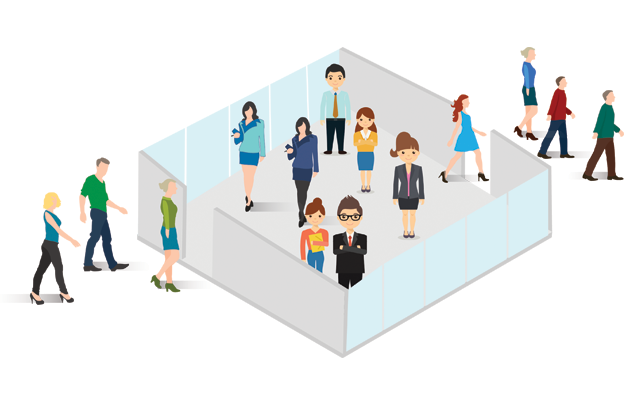

# Table of Contents
- [Objective](#objective)
- [1.Connecting to drive](#1-connecting-to-drive)
- [2.Importing Libraries](#2-importing-libraries)
- [3.Importing Dataset](#3-importing-dataset)
- [4.Exploratory Data Analyasis (EDA)](#4-exploratory-data-analysis-eda)
- [5.Data Visualization](#5-data-visualization)
- [6.Data Preprocessing](#6-data-preprocessing)
- [7.Train and Test splits](#7-train-and-test-splits)
- [8.Feature Scaling](#8-feature-scaling)
- [9.Model Implementation](#9-model-implementation)
- [10.Model Evaluation](#10-model-evaluation)

# Objective
This project is used to identify and visualize which factors contribute to customer churn and build a prediction model that will classify if a customer is going to churn or not
# Customer churn dataset
The following describes the dataset columns:
* RowNumber- serial number  
* CustomerId- id of customer
* Surname-surname of customer
* CreditScore-credit score of customer
* Geography-geography of customer
* Gender- customer gender
* Age - age of customer
* Tenure-tenure of customer
* Balance- balance of customer
* NumOfProducts- number of products customer has
* HasCrCard-whether customer has card or not
* IsActiveMember-whether customer is active member or not
* EstimatedSalary-estimated salary of customer
* Exited-whether customer will leave bank or not          

# 1.Connecting to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Importing  Libraries

In [144]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

# 3.Importing Dataset

In [145]:
data = pd.read_csv('/content/drive/MyDrive/customer churn dataset.csv')

# 4.Exploratort Data Analysis (EDA)

In [146]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0




*   This dataset consists of **14 columns**. It has **13 information attributes(features**) about the employee and a target attribute as **Exited** that tells
whether the person leaves the bank or not.
*  There are **5 categorical columns** i.e Geography, Gender, HasCrCard, IsActiveMember and Excited



In [148]:
data.shape

(10000, 14)

In [149]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [151]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [152]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object



*   Datatype of Surname, Gender and Geography column is Object.



In [153]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [154]:
data.duplicated().sum()

0



*  There is no null and duplicated values in this dataset.



In [155]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64



*  From the above, we will not require the first 2 attributes as they are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.




In [156]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [157]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Analysing the impact of each feature on the target attribute**

In [158]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# 5.Data Visualization

**Plotting percentage of churned and not churned entries**






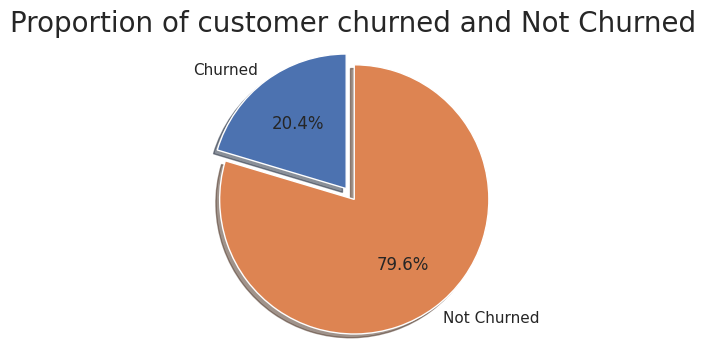

In [159]:
# univariate analysis
labels = 'Churned', 'Not Churned'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and Not Churned", size = 20)
plt.show()



*  So about 20.4% of the customers have churned.
*  And about 79.8% of the customers have not churned.



In [160]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [161]:
data['Geography'].value_counts()/len(data['Geography'])*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [162]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [163]:
data['Gender'].value_counts()/len(data['Gender'])*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [164]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [165]:
data['HasCrCard'].value_counts()/len(data['HasCrCard'])*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [166]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [167]:
data['IsActiveMember'].value_counts()/len(data['IsActiveMember'])*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

**Plotting 'Exited' relation with categorical variables**

<Axes: xlabel='IsActiveMember', ylabel='count'>

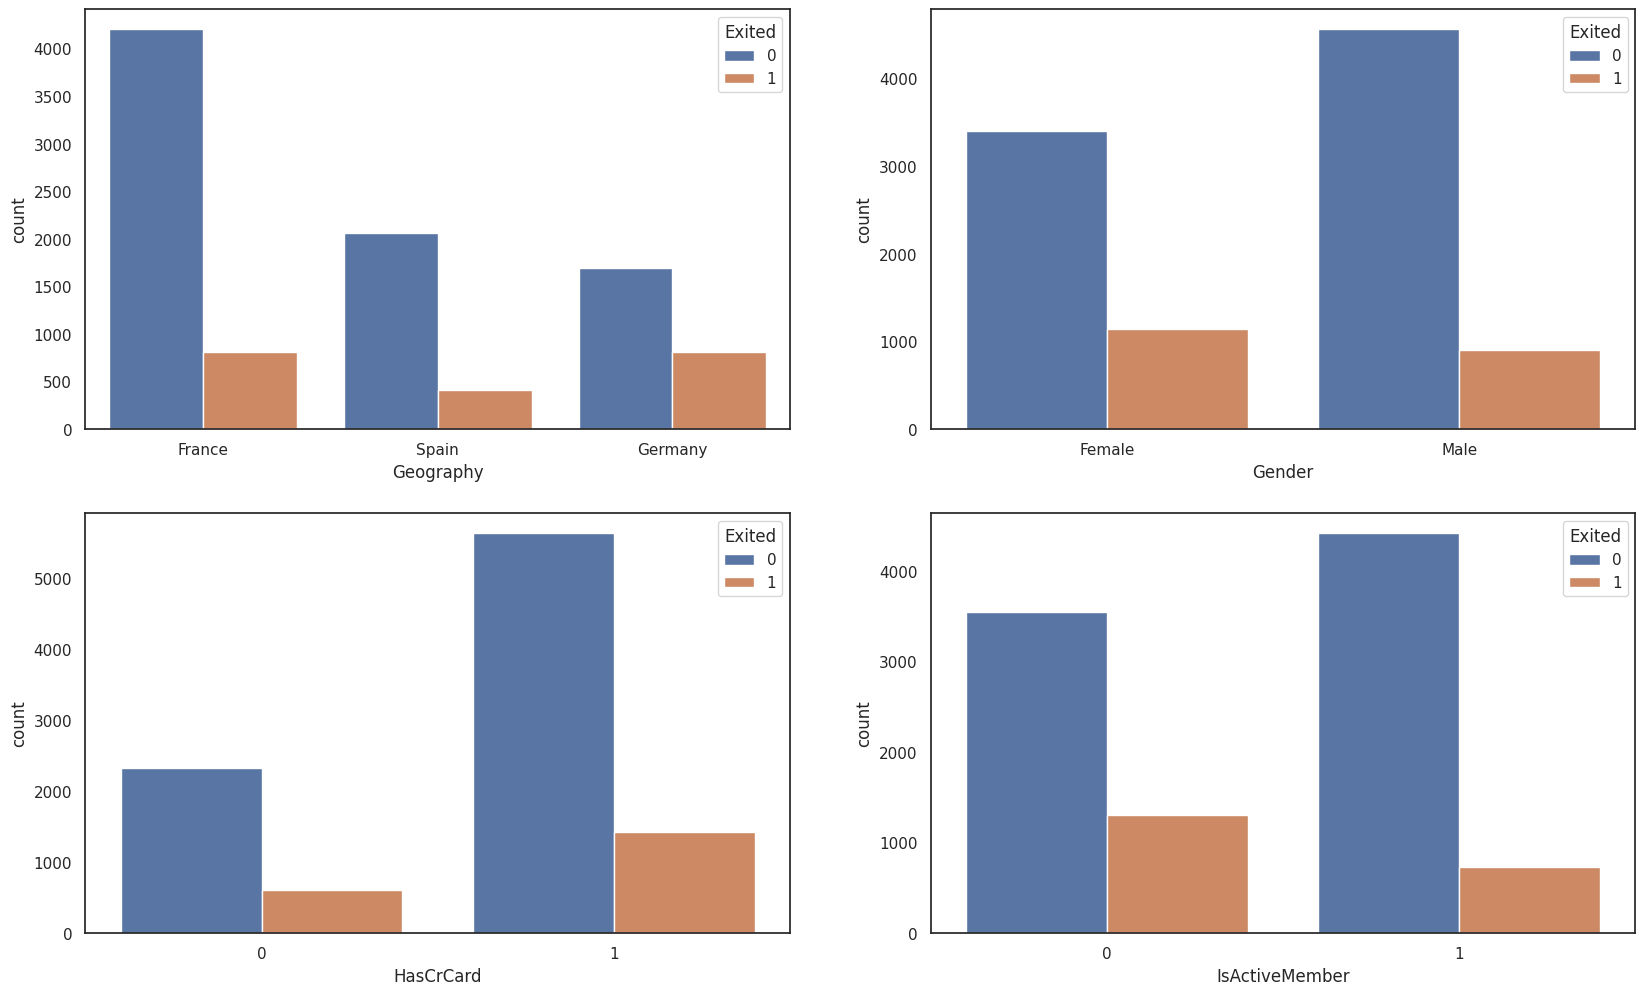

In [168]:
# bivariate analysis
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])



*   Majority of the data is from persons from France.
*  The proportion of female customers churning is also greater than that of male customers
*   Majority of the customers that churned are those with credit cards.
*   The inactive members have a greater churn.



**Relations based on the continuous data attributes**

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

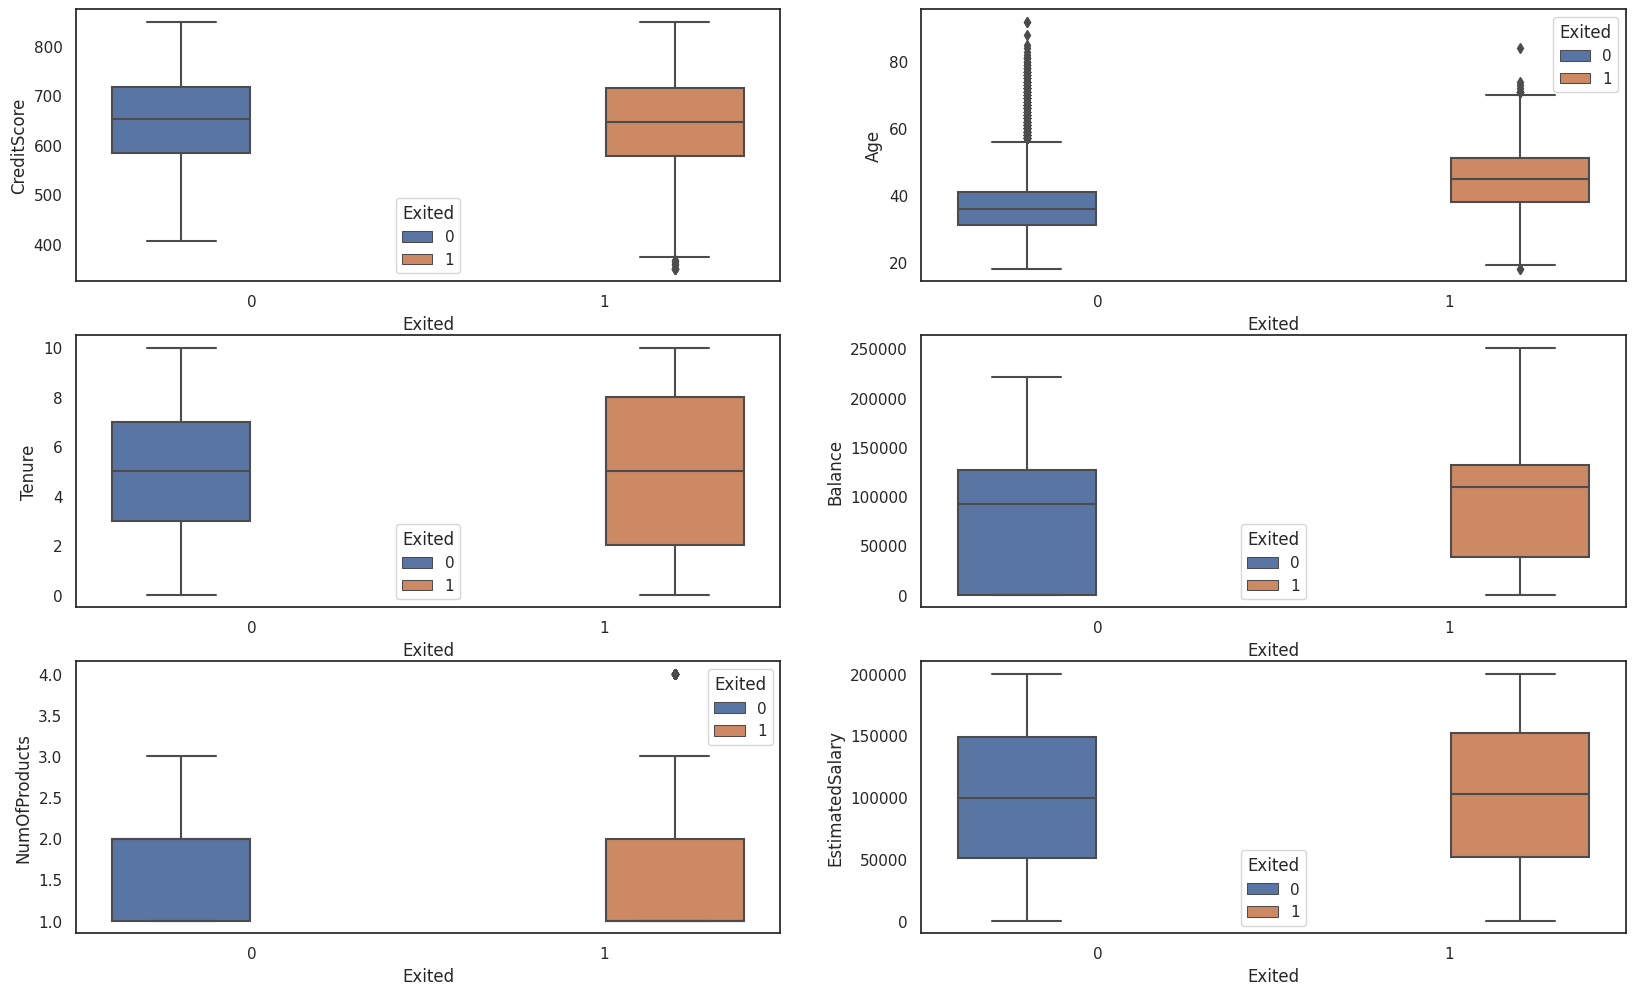

In [169]:
# bivariate analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])



*   There is no significant difference in the credit score distribution between not churned and churned customers.
*   The older customers are churning at more than the younger ones
*   With regard to the tenure, the clients spent little time with the bank or a lot of time with the bank are more likely to churn compared to those that are of average tenure.
*   Neither the product nor the salary has a significant effect on the likelihood to churn.
*  The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.


<Axes: xlabel='NumOfProducts'>

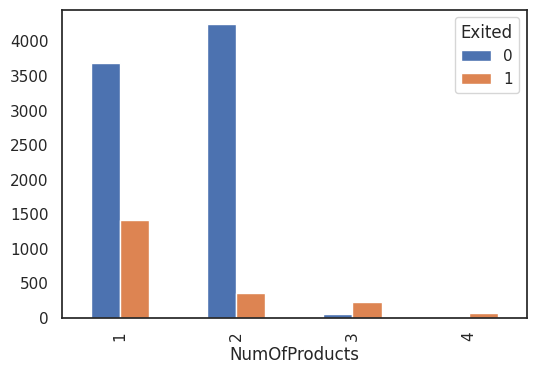

In [170]:
# bivariate analysis
data.groupby('Exited')['NumOfProducts'].value_counts().unstack('Exited').plot.bar(figsize=(6,4))

**Analysing the impact of CreditScore, IsActiveMember, HasCrCard and Tenure attributes against the target attribute(Exited) through Bar plots**

<Axes: xlabel='HasCrCard', ylabel='Tenure'>

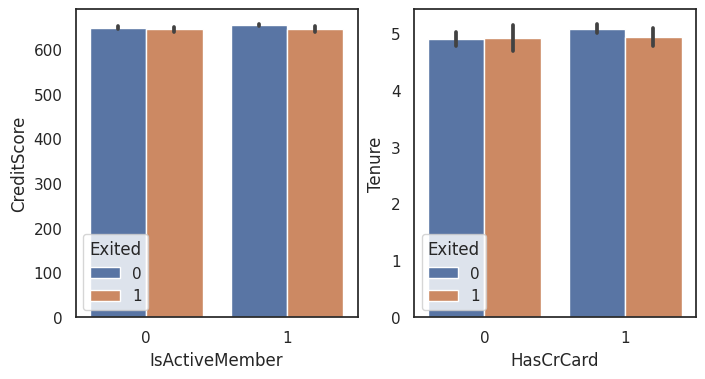

In [171]:
# multivariate analysis
# Analaysing the effect of being an active member and having credit card and whether or not they have exited.

fig, axarr = plt.subplots(1, 2, figsize=(8, 4))

# Plots the bar chart for IsActiveMember(x-axis) with CreditScore(y-axis) and categorises IsActiveMember further as people who Exited vs Not Exited.
sns.barplot(x='IsActiveMember',y = 'CreditScore', hue = 'Exited',data = data,ax=axarr[0])

# Plots the bar chart for HasCrCard(x-axis) with Tenure(y-axis) and categorises HasCrCard further as people who Exited vs Not Exited.
sns.barplot(x='HasCrCard',y = 'Tenure',hue = 'Exited',data = data, ax=axarr[1])

**Analysing the impact of Balance, Gender and Age attributes against the target attribute(Exited) through Bar plots**

In [172]:
# we need to know the min and max value of Age attribute inorder to stratify it
print("Minimum Age : " + str(min(data['Age'])))
print("Maximum Age : " + str(max(data['Age'])))


Minimum Age : 18
Maximum Age : 92


<Axes: xlabel='Age', ylabel='Balance'>

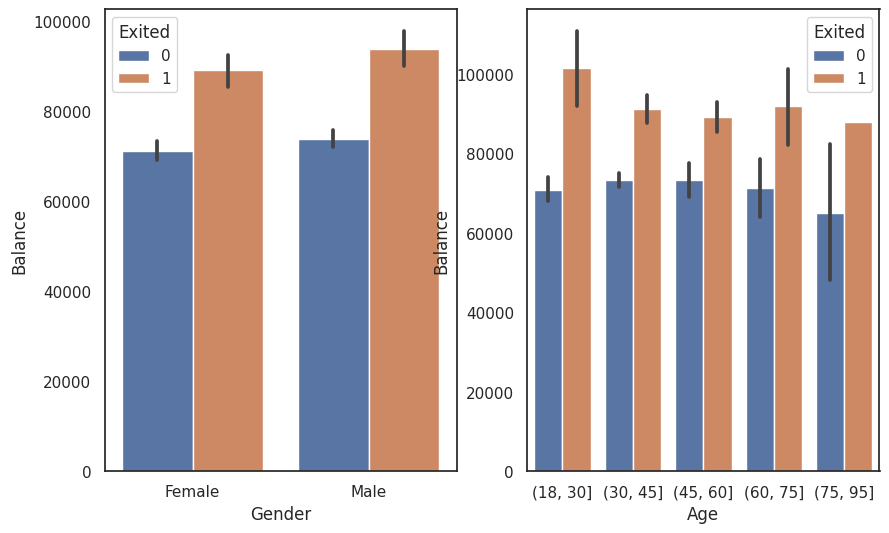

In [173]:
# multivariate analsis
# Creating a temporary DataFrame
data1 = pd.DataFrame()

# pd.cut() categorizes each Age value to fit in the specified cut range. Age is generalised to specific ranges for the purpose of plotting and analysing
data1['Age'] = pd.cut(data.Age, [18,30,45,60,75,95])
data1['Exited'] = data['Exited']
data1['Gender'] = data['Gender']
data1['Balance'] = data['Balance']

fig, axarr = plt.subplots(1, 2, figsize=(10, 6))

# Plots the bar chart for Gender(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
sns.barplot(x='Gender',y = 'Balance', hue = 'Exited', data = data1,ax=axarr[0])

# Plots the bar chart for Age(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
sns.barplot(x = 'Age', y = 'Balance', hue = 'Exited', data = data1,ax=axarr[1])


# 6.Data Preprocessing

**Converting categorical to numerical**

In [174]:
# converting Geography column into numerical
data = pd.get_dummies(data, prefix=['geo'],columns=['Geography'])
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [175]:
# Converting Gender column into numerical by applying label encoder
label1 = LabelEncoder()
data['Gender'] = label1.fit_transform(data['Gender'])

In [176]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


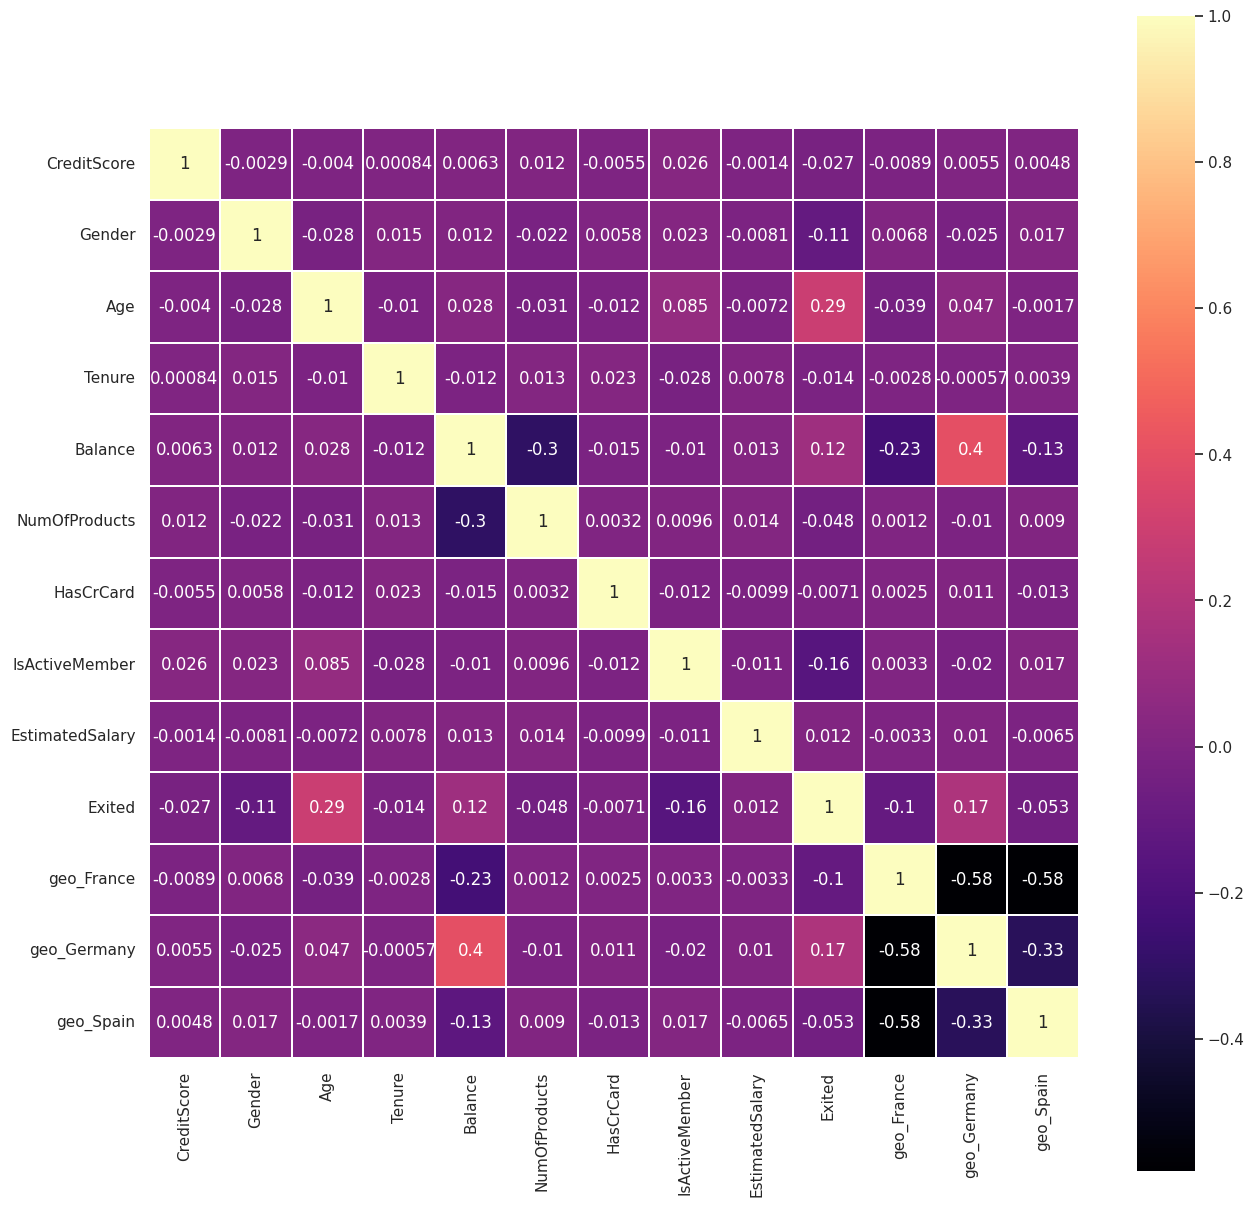

In [177]:
plt.figure(figsize=(15, 15))
sns.set(style = 'white')
sns.heatmap(data.select_dtypes(include='number').corr(), annot = True, cmap = 'magma', square = True, linewidths=0.1);

In [178]:
features = data.drop(labels=['Exited'], axis = 1)
target  = data['Exited']

In [179]:
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [180]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# 7.Train and test splits

In [181]:
train,test,trainlabel,testlabel = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [182]:
print("Training samples:" , train.shape[0])
print("Testing samples:" ,test.shape[0])
print("Training sample size:",train.shape)
print("Testing sample size:",test.shape)

Training samples: 8000
Testing samples: 2000
Training sample size: (8000, 12)
Testing sample size: (2000, 12)


# 8.Feature scaling

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)# Scaling fitted only to training set to avoid information leakage.
test = sc.transform(test)

# 9.Model Implementation

## **Building Artificial Neural Network Model**

In [184]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=32,activation="relu",kernel_initializer="normal",input_dim = 12), #input layer and hidden layer
        keras.layers.Dense(units=16,activation="relu",kernel_initializer="normal"), #hidden layer
        keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer="normal") #output layer
      ])

In [185]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [186]:
model.fit(train,trainlabel,batch_size=20,epochs = 100) #model run for 100 epochs

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.7975
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8256
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8321
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3794 - accuracy: 0.8391
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3725 - accuracy: 0.8449
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8468
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8500
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8490
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3587 - accuracy: 0.8519
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3563 - accura

**Predicting the Testing set results**

In [187]:
loss,acc = model.evaluate(test,testlabel)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

63/63 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8620
Test Accuarcy: 0.8619999885559082
Tets Loss: 0.3336864113807678


**Saving and loading the model**

In [188]:
model.save("/content/drive/MyDrive/churn/model_pd_85.h5")

In [189]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/churn/model_pd_85.h5")
trainloss , trainaccuracy = model.evaluate(train,trainlabel)
testloss, testaccuracy = model.evaluate(test,testlabel)
print('Train loss:', trainloss)
print('Train accuracy:', 100*trainaccuracy)
print('Test loss:', testloss)
print('Test accuracy:', 100*testaccuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8620
Train loss: 0.31284067034721375
Train accuracy: 86.82500123977661
Test loss: 0.3336864113807678
Test accuracy: 86.19999885559082


# 10.Model Evaluation

63/63 [==============================] - 0s 1ms/step


Text(66.25, 0.5, 'Expected')

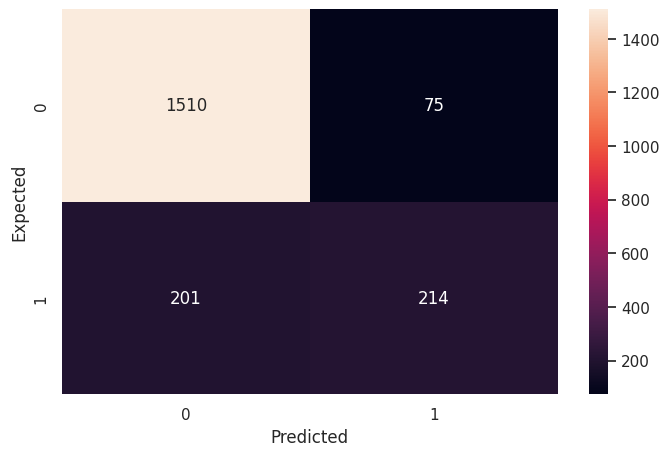

In [190]:
y_pred = model.predict(test)
y_pred_labels = y_pred > 0.5
cm = tf.math.confusion_matrix(labels=testlabel,predictions=y_pred_labels)

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')

## **Performance Metrics**

In [191]:
#PRECISION
precision_0 = round(1510 / (1510+201),2)
precision_1 = round(214 / (214+75),2)

print("Precision for customers who did not leave the bank:",precision_0)
print("Precision for customers who left the bank:",precision_1)

Precision for customers who did not leave the bank: 0.88
Precision for customers who left the bank: 0.74


In [192]:
#RECALL
recall_0 = round(1510 / (1510+75),2)
recall_1 = round(214 / (214+201),2)

print("Recall for customers who did not leave the bank:",recall_0)
print("Recall for customers who left the bank:",recall_1)

Recall for customers who did not leave the bank: 0.95
Recall for customers who left the bank: 0.52


In [193]:
#F1 SCORE
f1_score_0 = round(2 * ((precision_0 * recall_0) / (precision_0 + recall_0)),2)
f1_score_1 = round(2 * ((precision_1 * recall_1) / (precision_1 + recall_1)),2)

print("F1 score for customers who did not leave the bank:",f1_score_0)
print("F1 score for customers who left the bank:",f1_score_1)

F1 score for customers who did not leave the bank: 0.91
F1 score for customers who left the bank: 0.61


In [194]:
from sklearn.metrics import classification_report
print(classification_report(testlabel,y_pred_labels))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1585
           1       0.74      0.52      0.61       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



## **After analysing ,Testing the unknown sample**

In [195]:
result = model.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]]))
print(result)
if result>0.5:
    print("Customer will leave the bank in the future")
else:
    print("Customer will not leave the bank in the future")

1/1 [==============================] - 0s 21ms/step
[[0.031834]]
Customer will not leave the bank in the future


In [196]:
result = model.predict(sc.transform([[550, 0, 30, 2, 80000, 4, 1, 0, 70000, 0, 1, 0]]))
print(result)
if result>0.5:
    print("Customer will leave the bank in the future")
else:
    print("Customer will not leave the bank in the future")

1/1 [==============================] - 0s 30ms/step
[[0.9703836]]
Customer will leave the bank in the future
